#The Aim of this Notebook is to develop Cyclone Image Classification Model

In [38]:
#Import Required Libraries

In [39]:
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
#from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
from glob import glob
from keras.models import Model
import tensorflow as tf

In [40]:
import warnings
warnings.filterwarnings("ignore")

In [41]:
#Load Dataset

In [42]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [43]:
path='/content/gdrive/MyDrive/Project_Cyclone_img_Cls/Cyclone_Image_classification_Data'

In [44]:
#Random image of Severe Tropical Storm

In [45]:
tf.keras.preprocessing.image.load_img('/content/gdrive/MyDrive/Project_Cyclone_img_Cls/Cyclone_Image_classification_Data/Train/Severe Tropical Storm/Screenshot 2022-01-31 at 10.16.07 PM.png')

In [46]:
#Image of - Tropical Depression

In [47]:
tf.keras.preprocessing.image.load_img('/content/gdrive/MyDrive/Project_Cyclone_img_Cls/Cyclone_Image_classification_Data/Train/Tropical Depression/Screenshot 2022-02-02 at 6.53.58 PM.png')

In [48]:
#Image of - Tropical Storm

In [49]:
tf.keras.preprocessing.image.load_img('/content/gdrive/MyDrive/Project_Cyclone_img_Cls/Cyclone_Image_classification_Data/Train/Tropical Storm/Screenshot 2022-02-02 at 11.10.19 PM.png')

In [50]:
#*Image of - Typhoon *

In [51]:
tf.keras.preprocessing.image.load_img('/content/gdrive/MyDrive/Project_Cyclone_img_Cls/Cyclone_Image_classification_Data/Train/Typhoon/Screenshot 2021-12-22 at 6.23.43 PM.png')



**Data PreProcessing**

In [52]:

train_dataset='/content/gdrive/MyDrive/Project_Cyclone_img_Cls/Cyclone_Image_classification_Data/Train'
test_dataset='/content/gdrive/MyDrive/Project_Cyclone_img_Cls/Cyclone_Image_classification_Data/Test'

In [53]:
im_shape = (299,299)
seed = 10
BATCH_SIZE = 16


In [54]:
# With augmentation
data_generator = ImageDataGenerator(
        validation_split=0.2,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        preprocessing_function=preprocess_input,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')
val_data_generator = ImageDataGenerator(preprocessing_function=preprocess_input,validation_split=0.2)

In [55]:
traindata_generator=data_generator.flow_from_directory(train_dataset, target_size=im_shape, shuffle=True, seed=seed,
                                                     class_mode='categorical', batch_size=BATCH_SIZE, subset="training")

Found 128 images belonging to 4 classes.


In [56]:
validationdata_generator = val_data_generator.flow_from_directory(train_dataset, target_size=im_shape, shuffle=False, seed=seed,
                                                     class_mode='categorical', batch_size=BATCH_SIZE, subset="validation")

Found 32 images belonging to 4 classes.


In [57]:
testdata_generator = ImageDataGenerator(preprocessing_function=preprocess_input)
testdata_generator = testdata_generator.flow_from_directory(test_dataset, target_size=im_shape, shuffle=False, seed=seed,
                                                     class_mode='categorical', batch_size=BATCH_SIZE)

Found 80 images belonging to 4 classes.


In [58]:
nb_train_samples =traindata_generator.samples

In [59]:
nb_train_samples

128

In [60]:
nb_validation_samples = validationdata_generator.samples
nb_validation_samples

32

In [61]:
nb_test_samples = testdata_generator.samples
nb_test_samples

80

In [62]:
classes = list(traindata_generator.class_indices.keys())
print('Classes: '+str(classes))
num_classes  = len(classes)

Classes: ['Severe Tropical Storm', 'Tropical Depression', 'Tropical Storm', 'Typhoon']


**After preprocessing **

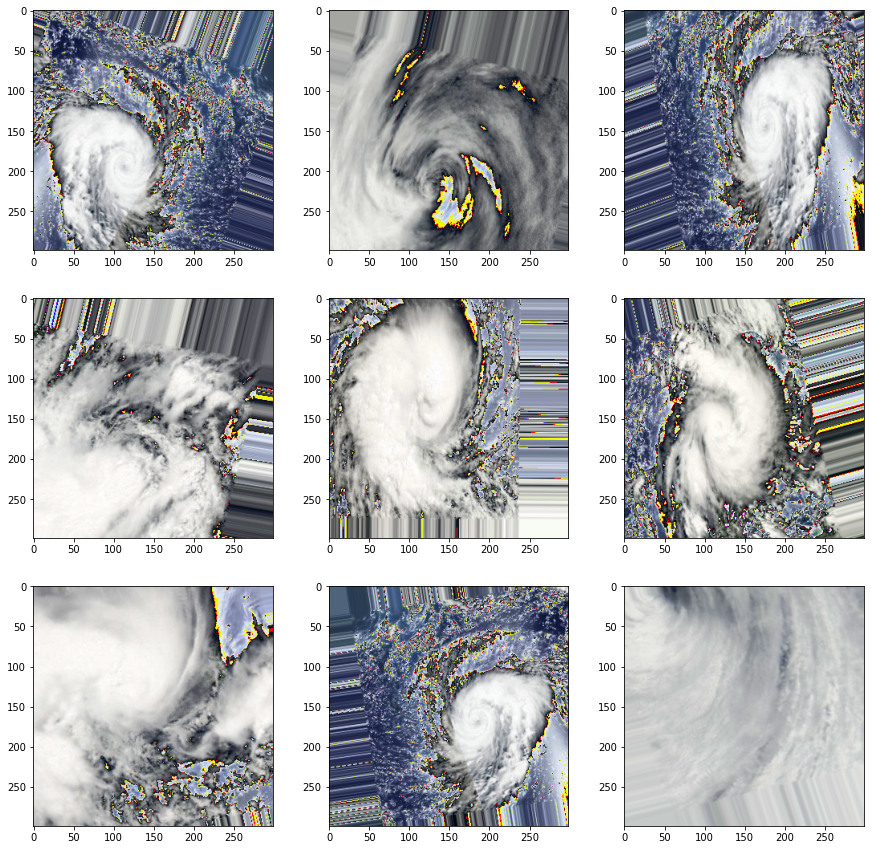

In [63]:
plt.figure(figsize=(15,15))
for i in range(9):
    plt.subplot(330 + 1 + i)
    batch = traindata_generator.next()[0]*255
    image = batch[0].astype('uint8')
    plt.imshow(image)
plt.show()

**Transfer Learning from a Deep Model**

In [64]:
base_model = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(im_shape[0], im_shape[1], 3))

x = base_model.output
x = Flatten()(x)
x = Dense(100, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax', kernel_initializer='random_uniform')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Freezing pretrained layers
for layer in base_model.layers:
    layer.trainable=False
    
optimizer = Adam()
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

In [65]:
epochs = 80

# Saving the best model
callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='model.h5',
        monitor='val_loss', save_best_only=False, verbose=1),
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=10,verbose=1)
]

history = model.fit(
        traindata_generator,
        steps_per_epoch=nb_train_samples // BATCH_SIZE,
        epochs=epochs,
        callbacks = callbacks_list,
        validation_data=validationdata_generator,
        verbose = 1,
        validation_steps=nb_validation_samples // BATCH_SIZE)

Epoch 1/80
8/8 [==============================] - ETA: 0s - loss: 4.6215 - accuracy: 0.3281
Epoch 1: saving model to model.h5
8/8 [==============================] - 24s 2s/step - loss: 4.6215 - accuracy: 0.3281 - val_loss: 1.3212 - val_accuracy: 0.5938
Epoch 2/80
8/8 [==============================] - ETA: 0s - loss: 1.2791 - accuracy: 0.5312
Epoch 2: saving model to model.h5
8/8 [==============================] - 11s 1s/step - loss: 1.2791 - accuracy: 0.5312 - val_loss: 1.4519 - val_accuracy: 0.4062
Epoch 3/80
8/8 [==============================] - ETA: 0s - loss: 0.8542 - accuracy: 0.6875
Epoch 3: saving model to model.h5
8/8 [==============================] - 11s 1s/step - loss: 0.8542 - accuracy: 0.6875 - val_loss: 1.2028 - val_accuracy: 0.5312
Epoch 4/80
8/8 [==============================] - ETA: 0s - loss: 0.9622 - accuracy: 0.6641
Epoch 4: saving model to model.h5
8/8 [==============================] - 11s 1s/step - loss: 0.9622 - accuracy: 0.6641 - val_loss: 0.6666 - val_accur

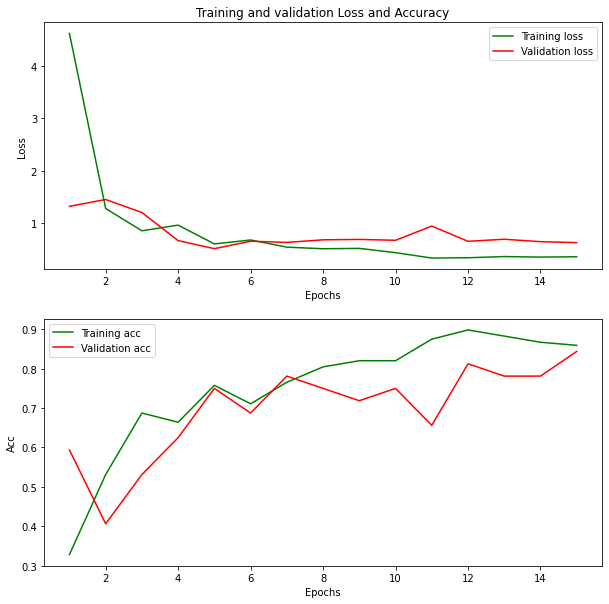

In [66]:
#Vamos ver como foi o treino?
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs_x = range(1, len(loss_values) + 1)
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(epochs_x, loss_values, 'g', label='Training loss')
plt.plot(epochs_x, val_loss_values, 'r', label='Validation loss')
plt.title('Training and validation Loss and Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(2,1,2)
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs_x, acc_values, 'g', label='Training acc')
plt.plot(epochs_x, val_acc_values, 'r', label='Validation acc')
#plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [67]:
from tensorflow.keras.models import load_model
# Load the best saved model
model = load_model('model.h5')

In [68]:
# Using the validation dataset
score = model.evaluate_generator(validationdata_generator)
print('Val loss:', score[0])
print('Val accuracy:', score[1])

Val loss: 0.6286854147911072
Val accuracy: 0.84375


In [69]:
# Using the test dataset
score = model.evaluate_generator(testdata_generator)
print('Val loss:', score[0])
print('Val accuracy:', score[1])

Val loss: 0.9721530079841614
Val accuracy: 0.612500011920929


In [70]:
testdata_generator.class_indices

{'Severe Tropical Storm': 0,
 'Tropical Depression': 1,
 'Tropical Storm': 2,
 'Typhoon': 3}

In [71]:
import itertools

#Plot the confusion matrix. Set Normalize = True/False
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
       plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Classification Report
                       precision    recall  f1-score   support

Severe Tropical Storm       0.62      0.65      0.63        20
  Tropical Depression       0.50      0.80      0.62        20
       Tropical Storm       0.67      0.40      0.50        20
              Typhoon       0.80      0.60      0.69        20

             accuracy                           0.61        80
            macro avg       0.65      0.61      0.61        80
         weighted avg       0.65      0.61      0.61        80



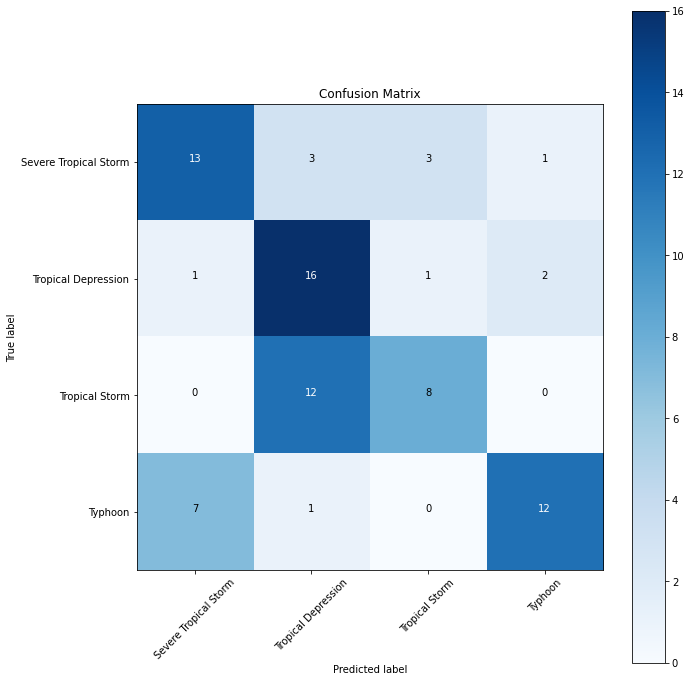

In [72]:
# Some reports
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

#Confution Matrix and Classification Report
Y_pred = model.predict_generator(testdata_generator)#, nb_test_samples // BATCH_SIZE, workers=1)
y_pred = np.argmax(Y_pred, axis=1)
target_names = classes

#Confution Matrix
cm = confusion_matrix(testdata_generator.classes, y_pred)
plot_confusion_matrix(cm, target_names, normalize=False, title='Confusion Matrix')
print('Classification Report')
print(classification_report(testdata_generator.classes, y_pred, target_names=target_names))